<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в анализ данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Авторы материала: преподаватели ФКН НИУ ВШЭ Талгат Даулбаев и Надежда Чиркова
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# Семинары 15 и 16. Обучение без учителя

## Часть 4. k-Means своими руками

Изучать кластеризацию удобно на географических данных (координатах каких-либо объектов), потому что такие объекты имеют два признака (удобно визуализировать) и часто образуют кластеры. Мы будем использовать набор коодинат российских населенных пунктов.

Ссылка на данные:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../../data/russian_coordinates.csv')

In [3]:
data.head()

,LAT,LONG
0,49.987000,142.157883
1,49.964722,143.263031
2,49.822498,142.154556
3,49.770195,144.087326
4,49.668335,144.100281


Визуализируем точки:

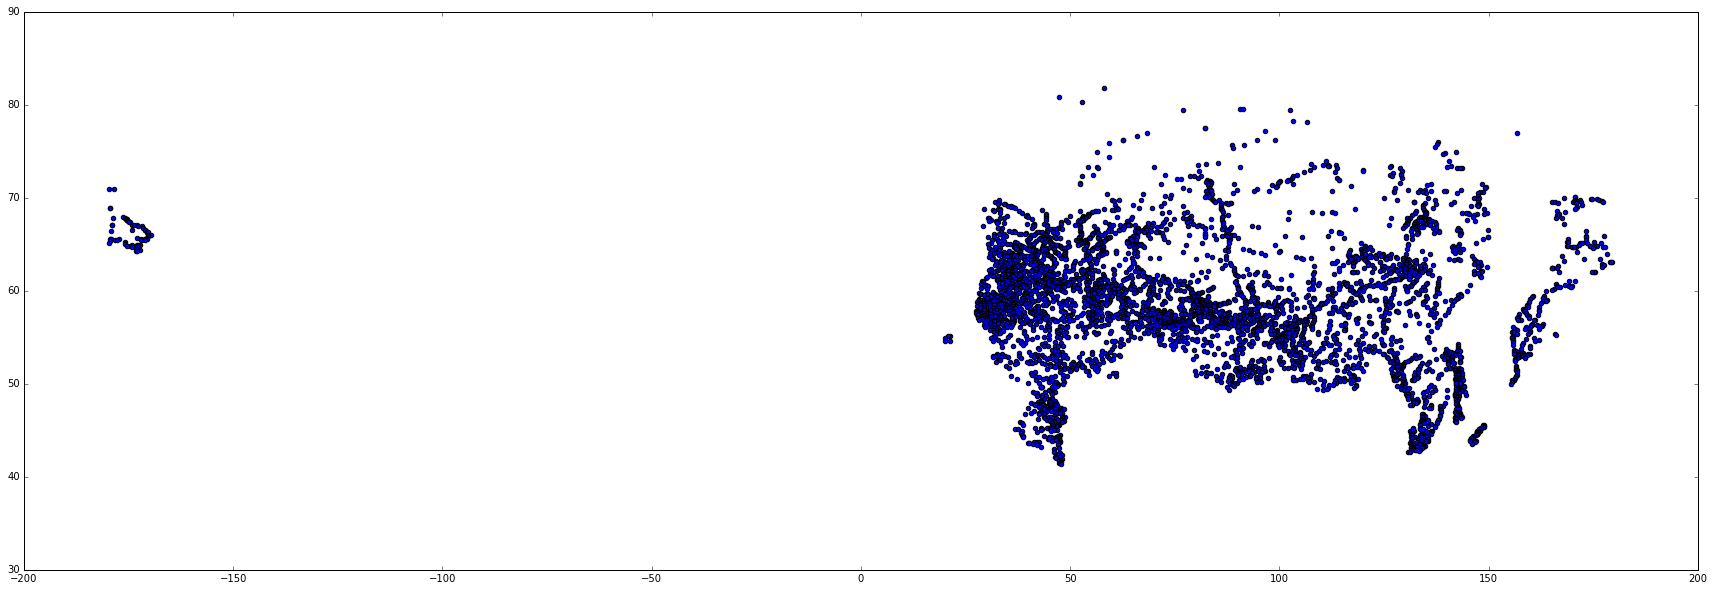

In [4]:
plt.figure(figsize=(30,10))
plt.scatter(data['LONG'], data['LAT'])

Картина напоминает очертания России. Слева - Калининградская область. Разумеется, расстояния искажаются, потому что мы отображаем точки в декартовой системе координат, а не на сфере. Этот же эффект бует иметь место при кластеризации.

Реализуем k-means самостоятельно: напишем класс с единственным методом fit_transform, по аналогии с интерфейсом sklearn.

In [5]:
from sklearn.metrics import pairwise_distances

In [6]:
class k_means:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
    def fit_transform(self, X, max_iter=10, visualize=False):
        """
        X - выборка размера количество объектов x количество признаков
        max_iter - максимальное число итераций - ранний останов не успели реализовать
        visualize - визуализировать точки на каждой итерации - не успели реализовать
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
        self.centers = np.zeros((self.n_clusters, n_features))
        self.clusters = np.random.randint(self.n_clusters, size=n_samples)
        for x in range(0, max_iter):
            for c in range(0, self.n_clusters):
                self.centers[c] = X[self.clusters==c].mean(axis=0)   
            distances = pairwise_distances(X, self.centers)
            self.clusters = np.argmin(distances, axis=1)
        return self.clusters

Тестируем:

In [7]:
clr = k_means(18)   # количество кластеров выбрали случайно

In [8]:
fits = clr.fit_transform(data.values)

In [9]:
from matplotlib import cm   # цветовые схемы

In [10]:
colors = cm.rainbow(np.linspace(0, 1, clr.n_clusters))

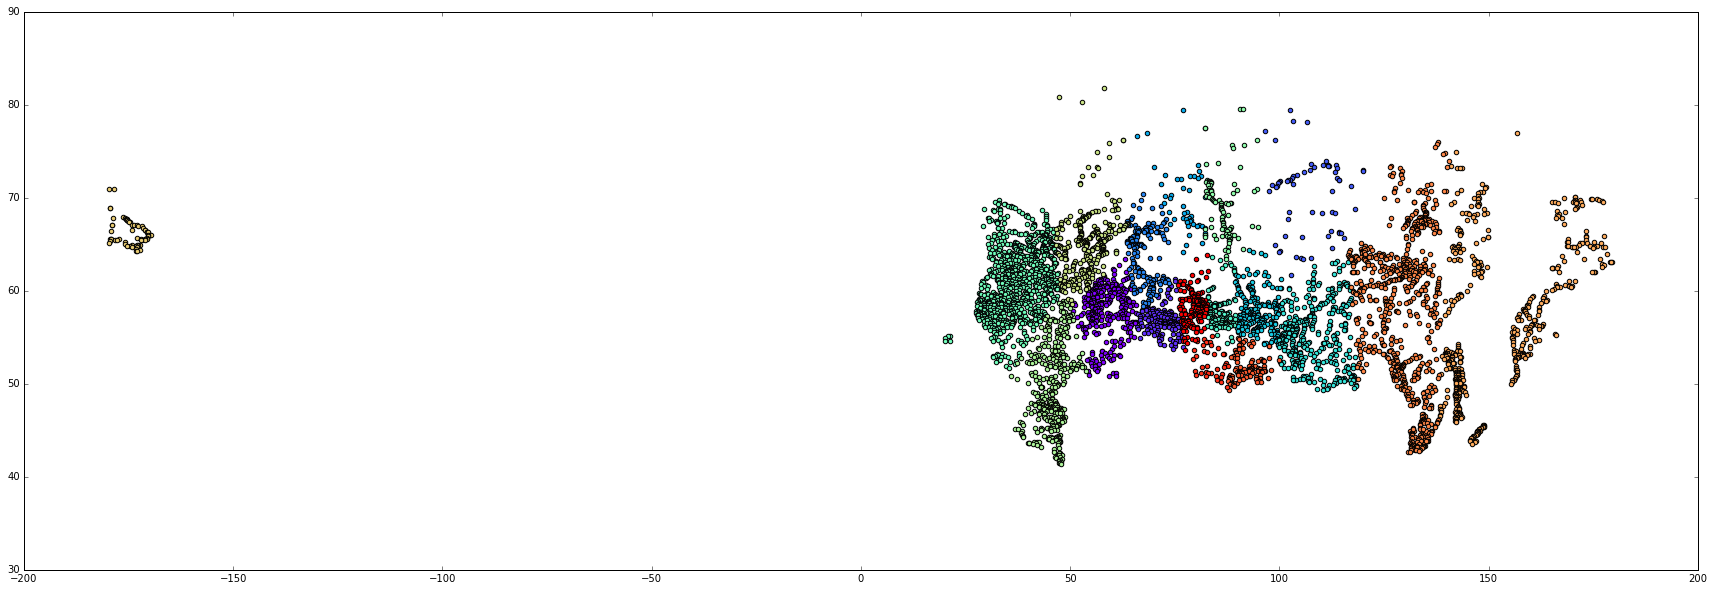

In [11]:
plt.figure(figsize=(30, 10))
for i in range(clr.n_clusters):
    plt.scatter(data.values[fits == i, 1], data.values[fits == i, 0], c=colors[i])